# **Ejemplo** 4 Regresion Logistica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.metrics import classification_report

## **1. Cargar datos**

## **Sobre el dataset**
Conjunto de datos tiene como objetivo predecir en base a medidas diagnósticas si un paciente tiene diabetes.

1. Pregnancies: Número de veces embarazadas
2. Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa
3. BloodPressure: Presión arterial diastólica (mm Hg)
4. SkinThickness: Grosor del pliegue cutáneo del tríceps (mm)
5. Insulin:insulina sérica de 2 horas (mu U/ml)
6. BMI: Índice de masa corporal (peso en kg/(altura en m)^2) (Body mass index)
7. DiabetesPedigreeFunction: función de pedigrí de diabetes 
8. Age: Edad (años)
9. Outcome: Variable de clase (0 o 1)


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mn-ariel/AUX_DS_ML_2_2023/main/datasets/diabetes.csv")

In [ ]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## **2. Limpiar datos**

In [ ]:
# Vamos a crear un funcion para limpiar las cabeceras del dataset

def format_column_names(df):
    df.columns = df.columns.str.lower().str.replace(" ","_", regex=True)
    df.columns = df.columns.str.replace(".","_", regex=True)
    df.columns = df.columns.str.replace("-","_", regex=True)
    df.columns = df.columns.str.replace(":","_", regex=True)

In [ ]:
format_column_names(df)
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Funcion para contar los datos nulos y si son categoricos o continuos

def null_column(cols, quantity):
    for col in cols:
        if df[col].dtype != 'O':
            print('Column',col,'with data continuos y NaN',(df[col].isna().sum()),'which is', ((df[col].isna().sum())/quantity)*100,'%')
        else:
            print('Column',col,'with data categorical y NaN',(df[col].isna().sum()),'which is', ((df[col].isna().sum())/quantity)*100,'%')

In [ ]:
# Filtrar todas las columnas que contengan un valor nulo en cualquiera de las columnas
null_cols = df.columns[df.isna().any()].tolist()
quantity_values = len(df.index)
null_column(null_cols, quantity_values)

## **3. Codificar datos**

In [ ]:
# Vamos a verificar que columnas tienen datos categoricos

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

[]

In [ ]:
# Vamos a verificar que columnas tienen datos continuos

con_cols = [col for col in df.columns if df[col].dtype != 'O']
con_cols

['pregnancies',
 'glucose',
 'bloodpressure',
 'skinthickness',
 'insulin',
 'bmi',
 'diabetespedigreefunction',
 'age',
 'outcome']

### Observamos que en la columna "**outcome**" tenemos dos clases "**1**"  y "**0**"


1.   **1** = Diabetes
2.   **0** = No tiene Diabetes



In [ ]:
# Vamos a convertir los datos categoricos a continuos

def col_cat_con(cat_colums ,df):
    for i in cat_colums :
        df[i] = df[i].astype('category').cat.codes

In [ ]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()['outcome']

pregnancies                 0.221898
glucose                     0.466581
bloodpressure               0.065068
skinthickness               0.074752
insulin                     0.130548
bmi                         0.292695
diabetespedigreefunction    0.173844
age                         0.238356
outcome                     1.000000
Name: outcome, dtype: float64

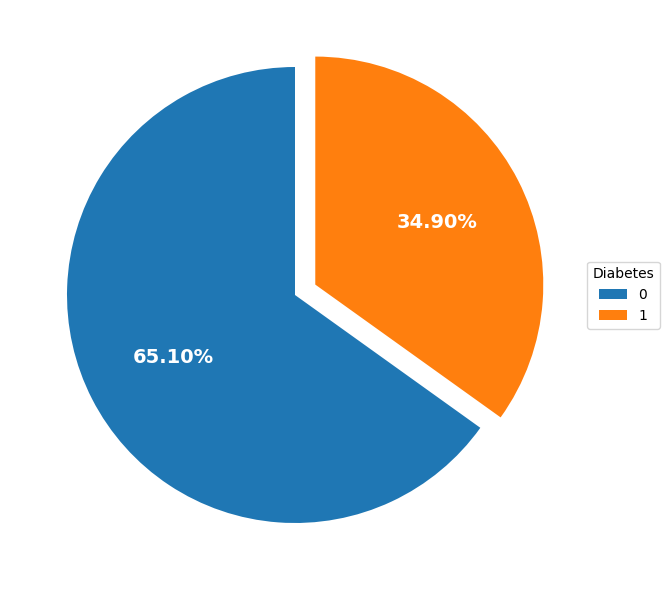

In [ ]:
pie_data = df['outcome'].value_counts(normalize=True).values * 100
pie_label = df['outcome'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Diabetes',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
df.corr()['outcome']

pregnancies                 0.221898
glucose                     0.466581
bloodpressure               0.065068
skinthickness               0.074752
insulin                     0.130548
bmi                         0.292695
diabetespedigreefunction    0.173844
age                         0.238356
outcome                     1.000000
Name: outcome, dtype: float64

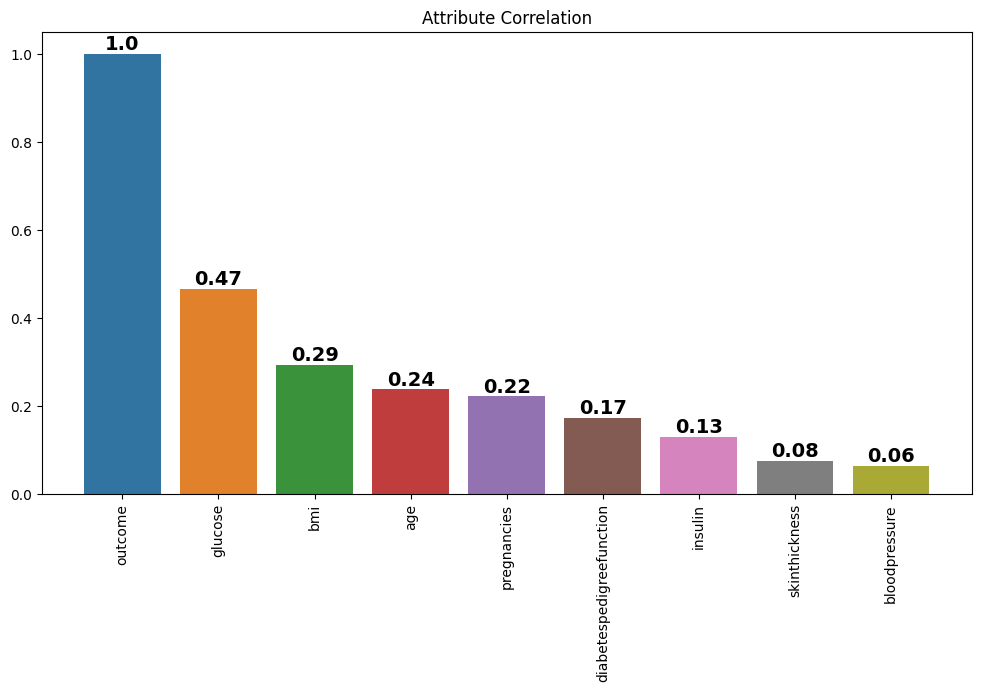

In [ ]:
corr_matrix = df.corr().round(3)
corr_target = corr_matrix['outcome'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation')

plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
  if corr_target[n] >= 0:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
  else:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')    

plt.show()

## **4. Imputar datos**
Para este no tenemos datos faltantes.
### **Seleccionar el Modelo de Clasificacion**

### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes

1.   Para el entramiento del modelo
2.   Para las pruebas del modelo 

In [ ]:
x = df.drop(['outcome'], axis = 1)
y = df['outcome']

In [ ]:
x

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 1)

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic.predict(x_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 78.355%


In [ ]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision : %s" % "{0:.3%}".format(precision))

Precision : 77.778%


In [ ]:
precision = metrics.recall_score(y_test, y_pred)
print("Precision : %s" % "{0:.3%}".format(precision))

Precision : 57.647%


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

In [ ]:
df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Diabetes', 1:'Diabetes'}, index={0:'Not Diabetes', 1:'Diabetes'}, inplace=True)
df_cm

,Not Diabetes,Diabetes
Not Diabetes,132,14
Diabetes,36,49


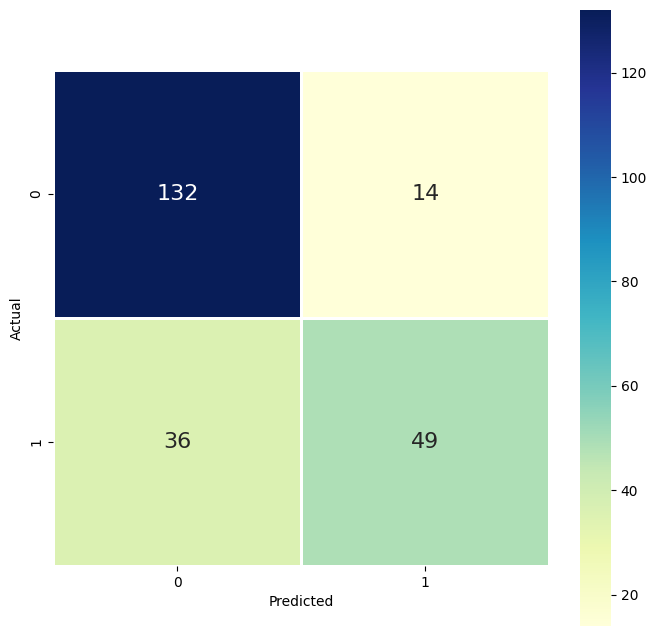

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

In [ ]:
df_cm

,Not Diabetes,Diabetes
Not Diabetes,132,14
Diabetes,36,49


In [ ]:
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalsos Positives(FP) = ', cm[0,1])

print('\nFalsos Negatives(FN) = ', cm[1,0])


True Positives(TP) =  132

True Negatives(TN) =  49

Falsos Positives(FP) =  14

Falsos Negatives(FN) =  36


#**Métricas de clasificación**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_accuracy = (TP + TN) / float(FP + TP + TN + FN)

print('Precision de clasificacion : {0:0.4f}%'.format(classification_accuracy))

Precision de clasificacion : 0.7835%


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Error de clasificacion : {0:0.4f}%'.format(classification_error))

Error de clasificacion : 0.2165%


In [ ]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}%'.format(precision))

Precision : 0.9041%


In [ ]:
recall = TP / float(TP + FN)

print('Sensibilidad : {0:0.4f}%'.format(recall))

Sensibilidad : 0.7857%
